In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
#fungsi kejadian pelemparan koin
#muncul head -> 0
#muncul tail -> 1
def kej_koin():
    return random.randint(0,1)
#memeriksa hasil fungsi kejadian pelemparan koin
kej_koin()

1

0.5

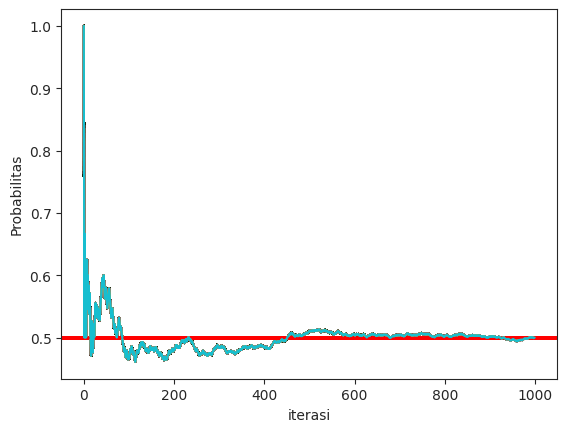

In [6]:
#fungsi monte carlo simulasi 
#membuat tempat untuk memasukkan nilai probabilitasnya
daftar1 = []

def monte_carlo(n):
    hasil_kejadian = 0
    for i in range(n):
        hasil_pelemparan = kej_koin()
        hasil_kejadian = hasil_kejadian + hasil_pelemparan
        
        #menghitung nilai probabilitasnya
        nilai_probabilitas = hasil_kejadian/(i+1)
        
        #tambahkan nilai probabilitas kelist yang sudah dibuat
        daftar1.append(nilai_probabilitas)
        
        #membuat plot hasil dari kejadian:
        plt.axhline(y=0.5, color='r', linestyle='-')
        plt.xlabel("iterasi")
        plt.ylabel("Probabilitas")
        plt.plot(daftar1)
        
    return hasil_kejadian/n
monte_carlo(1000)

In [ ]:
#distribusi normal
#membuat objek random generator
rng = np.random.default_rng(100)
#membangkitkan 1000 bilangan acak yang menyebar normal(50,5)
rand_normal = rng.normal(loc=50, scale=5, size=1000)
print(rand_normal)

[44.21225176 51.44877901 53.90427035 52.71986822 45.19308679 55.35504333
 53.5072783  53.52486728 53.72531301 55.52173619 61.21486198 46.94253439
 50.23605592 58.77117341 43.31010067 51.62787234 46.55441142 49.90089095
 52.37376623 40.34449292 45.03760861 42.97264459 48.84452246 46.55576458
 57.5755289  46.98414227 58.56842244 47.96875405 51.3570476  50.199201
 50.05759159 44.36410996 51.67356488 51.91945774 51.18917757 53.10705837
 45.90377227 48.51210397 46.69218648 41.47914837 51.8376816  46.82255603
 49.61139747 61.24883919 51.15155264 50.5370795  55.36972891 56.23176957
 59.06446349 47.39258013 58.97967471 49.34321101 44.20886603 45.35554342
 55.53923439 53.81270782 56.41261924 45.39087769 48.30105023 44.01141442
 40.1220713  49.90968262 57.91347312 55.56043563 46.11407364 55.83734891
 47.11610879 51.56055906 54.13494594 47.96207186 45.57681284 53.24806326
 49.11398461 47.24082071 53.17148044 48.9251466  51.91432902 45.17195568
 53.62013612 45.26667312 48.07173985 40.64180498 55.7

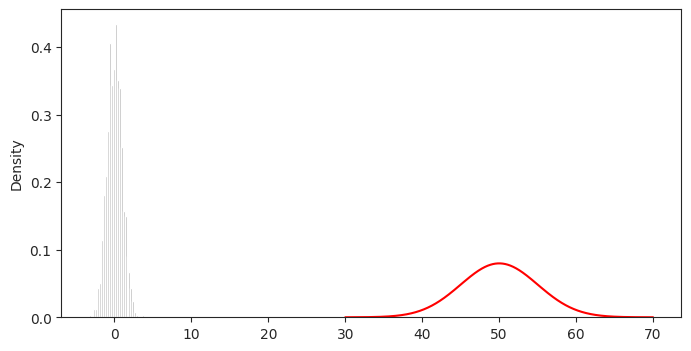

In [2]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import scipy.stats as sc
import numpy as np

np.random.seed(42)
rand_normal = np.random.normal(loc=0, scale=1, size=1000)

plt.figure(figsize=(8, 4))
sns.set_style("ticks")

sns.histplot(data=rand_normal, stat="density", color="grey", alpha=0.6)

x = np.linspace(30, 70, 1000)
y = stats.norm.pdf(x, loc=50, scale=5) 
sns.lineplot(x=x, y=y, color="red")

plt.show()

In [7]:
#import fungsi gamma dari spicy
from scipy.special import gamma
from scipy import stats
#fkp distribusi beta
def pdf_beta(x,alpha,beta):
  return (gamma(alpha + beta) / (gamma(alpha) * gamma(beta))) * x ** (alpha - 1) * (1 - x) ** (beta - 1)
#membuat fungsi distribusi proposal uniform(0,1)
#nilai uniform(0,1)
#untuk generalisasi
def pdf_proposal(x, bb, ba):
  return stats.uniform.pdf(x, bb, ba)

In [8]:
#fungsi perbandingan kita negatifkan (-)
def beta_per_prop(x):
  return -pdf_beta(x, alpha=2, beta=5)/pdf_proposal(x, bb=0, ba=1)

In [9]:
#import fungsi minimize dari scipy
from scipy.optimize import minimize
#mencari f(x)minimum
min = minimize(beta_per_prop, 0.5, method='BFGS')
#nilai minimum fungsi kita kali(-1)
c = min.fun*-1
print(c)

2.4575999999999976


<ipython-input-8-0065946d6012>:3: RuntimeWarning: divide by zero encountered in true_divide
  return -pdf_beta(x, alpha=2, beta=5)/pdf_proposal(x, bb=0, ba=1)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-8-0065946d6012>:3: RuntimeWarning: divide by zero encountered in true_divide
  return -pdf_beta(x, alpha=2, beta=5)/pdf_proposal(x, bb=0, ba=1)
<ipython-input-8-0065946d6012>:3: RuntimeWarning: divide by zero encountered in true_divide
  return -pdf_beta(x, alpha=2, beta=5)/pdf_proposal(x, bb=0, ba=1)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-8-0065946d6012>:3: RuntimeWarning: divide by zero encountered in true_divide
  return -pdf_beta(x, alpha=2, beta=5)/pdf_proposal(x, bb=0, ba=1)


In [10]:
#membuat objek random generator
rng = np.random.default_rng(100)
n = 1000
rand_data = []

while len(rand_data) < n:
  u = rng.uniform(low=0, high=1)
  x = rng.uniform()
  if pdf_beta(x,2,5)>c*u*pdf_proposal(x,0,1):
    rand_data.append(x)
rand_data = np.array(rand_data)
print(rand_data)

[0.04295157 0.18999147 0.32192526 0.1316484  0.08240137 0.52412082
 0.22724696 0.38472241 0.14887393 0.184949   0.10685547 0.07369337
 0.22351108 0.39434801 0.19179735 0.31065823 0.27069433 0.40063662
 0.40358433 0.39342567 0.24543    0.36878674 0.39690697 0.2820133
 0.42113953 0.2953121  0.18863521 0.02640102 0.52289787 0.44564202
 0.49734491 0.08741339 0.2017177  0.24387965 0.15943962 0.15949227
 0.0891861  0.21880623 0.25766831 0.23203991 0.14105128 0.32318433
 0.0678679  0.27065857 0.19595764 0.32388553 0.44516882 0.2496437
 0.26941798 0.22573534 0.38285673 0.10974077 0.39650642 0.16953247
 0.1978026  0.25720372 0.34607433 0.07595889 0.25589178 0.04519305
 0.65154425 0.23543352 0.37013986 0.49864768 0.07798222 0.23422257
 0.14128812 0.23114171 0.60363117 0.25827401 0.42464207 0.1168337
 0.48032588 0.44921342 0.65353001 0.29529866 0.24034102 0.43695045
 0.47853596 0.07500282 0.5596905  0.2744632  0.19469565 0.16031402
 0.60099975 0.2100057  0.12414905 0.12961583 0.32229157 0.1523696

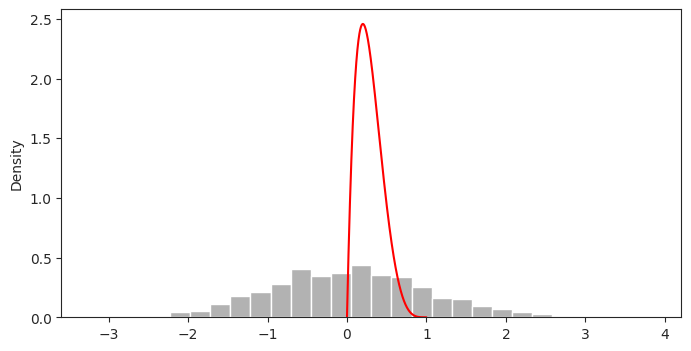

In [11]:
plt.figure(figsize=(8,4))
sns.set_style('ticks')
#histogram dari bilangan acak yang dibangkitkan
sns.histplot(data=rand_normal, stat="density", color="grey", alpha=0.6)
#membuat kurva sebaran beta(alpha=2, beta=5)
x = np.linspace(0, 1, 1000)
y = pdf_beta(x, alpha=2, beta=5) 
sns.lineplot(x=x, y=y, color="red")
plt.show()